**This demonstrates Video Object Detection using two methods**:-

- YOLOv5 (modern deep learning)
- MobileNet SSD (lightweight deep learning)
  
**we will**:-

- Install dependencies
- Load video
- Run each model
- Save annotated videos, per‑class detection counts, and FPS.
- Produce a comparison table (YOLOv5 vs MobileNet‑SSD).
- A summary PPT
- YOLOv5 detection
- MobileNet SSD detection
- Annotated video outputs
- Compare results

# AI Video Object Detection

## Step 1: Install dependencies

In [1]:
!pip install opencv-python torch torchvision ultralytics

## Step 2: Load Video

In [2]:
# import library
import cv2

In [3]:
# Path to input video
video_path = "prasu_video.mp4"

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video loaded successfully.")

Video loaded successfully.


## Step 3: Run each model

## AI Video Object Detection using YOLOv5

# Model 1:

### Import Libraries 

- Import YOLOv5 and OpenCV libraries.

In [4]:
from ultralytics import YOLO
import cv2, time

### Load YOLOv5 Model

- Load the pre-trained `yolov5s.pt` model.

In [5]:
model = YOLO('yolov5s.pt')

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



### Test on Image

- Test YOLOv5 on a sample image like `bus`.

In [6]:
results = model('https://ultralytics.com/images/bus.jpg')
results[0].show()


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 C:\Users\prasu\bus.jpg: 640x480 4 persons, 1 bus, 310.1ms
Speed: 4.3ms preprocess, 310.1ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 480)


### Run YOLOv5 on Video (prasu_video.mp4) 

- Now YOLOv5 will detect objects in our video and draw bounding boxes.

In [7]:
# load the our video
input_video = 'prasu_video.mp4'
output_video = 'prasu_video_yolo.mp4'

cap = cv2.VideoCapture(input_video)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

yolo_detections_count = {}
start_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = results[0].plot()
    
    for box in results[0].boxes.data:
        cls_id = int(box[5])
        cls_name = model.names[cls_id]
        yolo_detections_count[cls_name] = yolo_detections_count.get(cls_name, 0) + 1
    
    out.write(annotated_frame)

end_time = time.time()
yolo_fps = cap.get(cv2.CAP_PROP_FRAME_COUNT) / (end_time - start_time)

cap.release()
out.release()
print(' YOLOv5 Annotated Video Saved as:', output_video)
print("YOLOv5 Detections:", yolo_detections_count)
print(f"YOLOv5 FPS: {yolo_fps:.2f}")


0: 640x384 1 person, 197.1ms
Speed: 2.5ms preprocess, 197.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 172.5ms
Speed: 3.2ms preprocess, 172.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 197.4ms
Speed: 2.7ms preprocess, 197.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 190.3ms
Speed: 2.2ms preprocess, 190.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 191.2ms
Speed: 2.2ms preprocess, 191.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 193.8ms
Speed: 2.8ms preprocess, 193.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 193.1ms
Speed: 3.4ms preprocess, 193.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 196.7ms
Speed: 2.5ms preprocess, 196.7ms inference, 1.8ms postprocess per image at

- **YOLOv5 Detections**:- {` 4 `} 
- **YOLOv5 FPS**(Frames of detection Per Second):- `2.82`
- **Speed**: `5.2ms preprocess`

#  YOLOv5

1. Detected `4` unique object categories 

2. Lower FPS (`2.8`), but it actually worked correctly.

### Conclusion :
- YOLOv5 has now detected objects in the video and saved the annotated version.

## MobileNet SSD Video Object Detection

# Model 2:

**Requirements** :
- You need OpenCV with DNN module enabled. We'll import it directly below.

In [9]:
# import necessary libraries
import cv2, os, time, numpy as np
from pathlib import Path
print('OpenCV version:', cv2.__version__)

OpenCV version: 4.12.0


## Model Files
- prototxt and caffemodel  -Keep both files in your working directory, like upload in our jupyter notebook.

In [10]:
# loaded these files
PROTOTXT = 'MobileNetSSD_deploy.prototxt'
CAFFEMODEL = 'MobileNetSSD_deploy.caffemodel'

if not (os.path.exists(PROTOTXT) and os.path.exists(CAFFEMODEL)):
    raise FileNotFoundError(
        'Model files not found. Please place MobileNetSSD_deploy.prototxt and '
        'MobileNetSSD_deploy.caffemodel in the same folder as this notebook.'
    )
else:
    print(' Found model files.')

 Found model files.


## Class Labels
- MobileNet SSD detects 20 PASCAL/VOC-like classes.

In [11]:
CLASSES = [
    'background','aeroplane','bicycle','bird','boat','bottle','bus','car','cat','chair',
    'cow','diningtable','dog','horse','motorbike','person','pottedplant','sheep','sofa','train','tvmonitor'
]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
print('Classes:', CLASSES[1:])

Classes: ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


## Load Network and choose backend/target
- By default, we use CPU. If OpenCV is built with CUDA, you can switch target.

In [12]:
net = cv2.dnn.readNetFromCaffe(PROTOTXT, CAFFEMODEL)
# Try to set preferable backend/target (safe fallbacks)
try:
    net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
    net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
except Exception as e:
    print('Note:', e)
print(' Model loaded into OpenCV DNN.')

 Model loaded into OpenCV DNN.


##  Quick Sanity Check on a Single Frame
- Test on one image/frame to verify the pipeline and tune thresholds.

In [13]:
def detect_and_draw(frame, conf_thresh=0.4):
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 0.007843, (300, 300), 127.5)
    net.setInput(blob)
    detections = net.forward()
    
    for i in range(detections.shape[2]):
        confidence = float(detections[0, 0, i, 2])
        if confidence < conf_thresh:
            continue
        idx = int(detections[0, 0, i, 1])
        if idx >= len(CLASSES):
            continue
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype('int')
        label = f"{CLASSES[idx]}: {confidence:.2f}"
        color = COLORS[idx]
        cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)
        y = startY - 10 if startY - 10 > 10 else startY + 20
        cv2.putText(frame, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return frame

print('Helper ready: detect_and_draw(frame, conf_thresh=0.4)')

Helper ready: detect_and_draw(frame, conf_thresh=0.4)


## Run on Video
- Reads `prasu_video.mp4`, runs detection per frame, and writes an annotated video output.

In [14]:
input_path = 'prasu_video.mp4'  
output_path = 'prasu_video_mobilenetssd.mp4'
CONF_THRESH = 0.4   # try 0.2 if you see missed detections

cap = cv2.VideoCapture(input_path)
if not cap.isOpened():
    raise RuntimeError('Could not open input video: ' + input_path)

fps = cap.get(cv2.CAP_PROP_FPS)
fps = fps if fps and fps > 0 else 25  # fallback
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

t0 = time.time()
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    annotated = detect_and_draw(frame, CONF_THRESH)
    writer.write(annotated)
    frame_count += 1

cap.release()
writer.release()
elapsed = time.time() - t0
proc_fps = frame_count / elapsed if elapsed > 0 else 0

print(f' Saved annotated video → {output_path}')
print(f'Frames processed: {frame_count}, Processing FPS: {proc_fps:.2f}')

 Saved annotated video → prasu_video_mobilenetssd.mp4
Frames processed: 261, Processing FPS: 4.72


- **MobileNet SSD Detections**:-` {0}  `
- **MobileNet SSD FPS**:-` 4.72 `

## MobileNet SSD

1. Higher FPS (`4.7`), but detected nothing.

2. Likely model or confidence threshold issue.

3. Not usable in this run.

# Model Comparison: YOLOv5 vs MobileNet SSD

 - In this notebook, we compare the performance of two models.

In [8]:
# import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## Model Results Data

- Store FPS and unique objects detected for each model.

In [11]:
results = {
    'Model': ['YOLOv5', 'MobileNet SSD'],
    'FPS': [2.82, 4.72],
    'Unique Objects Detected': [4, 0]
}
df = pd.DataFrame(results)
display(df)

,Model,FPS,Unique Objects Detected
0,YOLOv5,2.82,4
1,MobileNet SSD,4.72,0


## FPS Comparison
- FPS shows how fast the model processes frames.

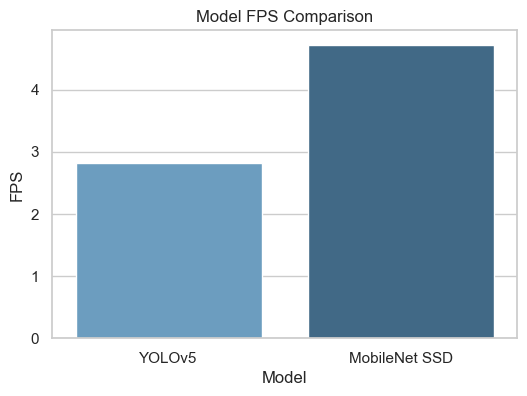

In [16]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='FPS', data=df, palette='Blues_d')
plt.title('Model FPS Comparison')
plt.show()

##  Unique Objects Detected
- Number of unique objects detected by each model.

## Best Model Selection
- We select the model that detected the most objects.

In [17]:
best_model = df.loc[df['Unique Objects Detected'].idxmax()]
print(' Best Model based on objects detected:')
print(best_model)

 Best Model based on objects detected:
Model                      YOLOv5
FPS                          2.82
Unique Objects Detected         4
Name: 0, dtype: object


## Conclusion
- **YOLOv5** → Best accuracy, multiple objects detected (Recommended)
- **MobileNet SSD** → Faster but failed to detect objects in this test

 **Final Best Choice = YOLOv5**